 # **Building an SVM Classifier for MNIST with Hyperparameter Tuning and Comparative Analysis**

In this assignment, you will extend your work on the MNIST dataset by applying a Support Vector Machine (SVM) classifier. Your task is to fine-tune the SVM for hyperparameter optimization and compare its performance with the KNN and other classifiers from Assignment 4 (e.g., SGD, Random Forest). You will analyze the results to determine which classifier performs best on the MNIST dataset.

Assignment Instructions:

- Train an SVM Classifier on the MNIST Dataset
- Use Grid/Random Search with Cross-Validation to find the best hyperparameter values for the SVM classifier.
- For the rbfnomial Kernel, optimize the degree, C, and coef0 hyperparameters.
- For the RBF Kernel, focus on optimizing C and gamma.
- Compare the performance of the SVM with different kernels (Linear, Polynomial, and RBF) and select the best one based on test set accuracy and other metrics like precision, recall, and F1-score.

Compare the SVM classifier’s performance with your classifiers from Assignment 4, i.e KNN, SGD, and Random Forest. Pay attention to accuracy, precision, recall, and other evaluation metrics. Also, include training time (computational complexity) as evaluation metric.

## **Import libraries**

In [6]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import time

## **Import data set MINST and split training and test set**

In [7]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()
X, y = mnist ["data"], mnist["target"]
X.shape
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## **Scale the data**

In [8]:
#This part is essential because after that we can get normlized pixels and more stable data.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **SVC Linear**

In [9]:
#Select kernel
svm_linear = SVC(kernel='linear')
#Train and get the training time
start_training = time.time()
svm_linear.fit(X_train_scaled, y_train)
end_training = time.time()
#Predict the values and get the prediction time

y_pred_train_lin = svm_linear.predict(X_train_scaled)


start_predictions = time.time()
y_pred_linear = svm_linear.predict(X_test_scaled)
end_predictions = time.time()
#Calculate all the things
acc_lin_pred = accuracy_score(y_test, y_pred_linear)
acc_lin_train = accuracy_score(y_train, y_pred_train_lin)
pre_lin = precision_score(y_test, y_pred_linear, average='weighted')
rec_lin = recall_score(y_test, y_pred_linear, average='weighted')
f1_lin = f1_score(y_test, y_pred_linear, average='weighted')
training_time_lin = end_training - start_training
#Format data
Lin_result = pd.DataFrame({
    "Accuracy Test": [f"{acc_lin_pred:.4f}"],
    "Accuracy Train": [f"{acc_lin_train:.4f}"],
    "Precision": [f"{pre_lin:.4f}"],
    "Recall": [f"{rec_lin:.4f}"],
    "F1 Score": [f"{f1_lin:.4f}"],
    "Training time (s)": [f"{training_time_lin:.2f}"],
    "Prediction Time (s)": [f"{end_predictions - start_predictions:.2f}"]
}, index=["Linear"])
#Print result
print("Linear Kernel Results")
Lin_result

Linear Kernel Results


,Accuracy Test,Accuracy Train,Precision,Recall,F1 Score,Training time (s),Prediction Time (s)
Linear,0.9293,0.9821,0.9294,0.9293,0.9291,264.56,44.32


## **SVC Polynimical**


### TEST 1

In [ ]:
param_grid_poly = {
    'degree': [2, 3, 4],
    'C': [0.1, 1, 10],
    'coef0': [0, 0.5, 1]
}
svm_poly = SVC(kernel='poly')

grid_poly = GridSearchCV(
    svm_poly,
    param_grid_poly,
    cv=3,
    verbose=2,
    n_jobs=5,
    scoring="accuracy"
)

grid_poly.fit(X_train_scaled[:10000], y_train[:10000])
best_poly = grid_poly.best_estimator_

start_predictions = time.time()
y_pred_poly = best_poly.predict(X_test_scaled[:2000])
end_predictions = time.time()

acc_poly = accuracy_score(y_test[:2000], y_pred_poly)
pre_poly = precision_score(y_test[:2000], y_pred_poly, average='weighted')
rec_poly = recall_score(y_test[:2000], y_pred_poly, average='weighted')
f1_poly = f1_score(y_test[:2000], y_pred_poly, average='weighted')
training_time_poly = grid_poly.refit_time_


poly_result_t1 = pd.DataFrame({
    "Accuracy Test": [f"{acc_poly:.4f}"],
    "Precision": [f"{pre_poly:.4f}"],
    "Recall": [f"{rec_poly:.4f}"],
    "F1 Score": [f"{f1_poly:.4f}"],
    "Training time (s)": [f"{training_time_poly:.2f}"],
    "Prediction Time (s)": [f"{end_predictions - start_predictions:.2f}"]
}, index=["Poly"])


print("Polynomial Kernel Results test 1")
poly_result_t1

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [ ]:
grid_poly.best_estimator_

,C,10
,kernel,'poly'
,degree,4
,gamma,'scale'
,coef0,0.5
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### TEST 2

In [ ]:
param_grid_poly = {
    'degree': [4,5,6],
    'C': [10,25,50,75,100],
    'coef0': [0.4, 0.5, 0.6]
}
svm_poly = SVC(kernel='poly')

grid_poly = GridSearchCV(
    svm_poly,
    param_grid_poly,
    cv=3,
    verbose=2,
    n_jobs=5,
    scoring="accuracy"
)

grid_poly.fit(X_train_scaled[:10000], y_train[:10000])
best_poly = grid_poly.best_estimator_

start_predictions = time.time()
y_pred_poly = best_poly.predict(X_test_scaled[:2000])
end_predictions = time.time()

acc_poly = accuracy_score(y_test[:2000], y_pred_poly)
pre_poly = precision_score(y_test[:2000], y_pred_poly, average='weighted')
rec_poly = recall_score(y_test[:2000], y_pred_poly, average='weighted')
f1_poly = f1_score(y_test[:2000], y_pred_poly, average='weighted')
training_time_poly = grid_poly.refit_time_


poly_result_t2 = pd.DataFrame({
    "Accuracy Test": [f"{acc_poly:.4f}"],
    "Precision": [f"{pre_poly:.4f}"],
    "Recall": [f"{rec_poly:.4f}"],
    "F1 Score": [f"{f1_poly:.4f}"],
    "Training time (s)": [f"{training_time_poly:.2f}"],
    "Prediction Time (s)": [f"{end_predictions - start_predictions:.2f}"]
}, index=["Poly"])


print("Polynomial Kernel Results test 2")
poly_result_t2

Fitting 3 folds for each of 45 candidates, totalling 135 fits
Polynomial Kernel Results test 2


,Accuracy Test,Precision,Recall,F1 Score,Training time (s),Prediction Time (s)
Poly,0.9475,0.9477,0.9475,0.9474,8.87,3.33


In [ ]:
grid_poly.best_estimator_

,C,10
,kernel,'poly'
,degree,4
,gamma,'scale'
,coef0,0.4
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### Final test with all the data

Train and calculate with all data set:

In [ ]:
start_training = time.time()
best_poly = grid_poly.best_estimator_.fit(X_train_scaled, y_train)
end_training = time.time()

y_pred_train_poly = best_poly.predict(X_train_scaled)

start_predictions = time.time()
y_pred_test_poly = best_poly.predict(X_test_scaled)
end_predictions = time.time()

acc_poly_train = accuracy_score(y_train, y_pred_train_poly)
acc_poly_pred = accuracy_score(y_test, y_pred_test_poly)
pre_poly = precision_score(y_test, y_pred_test_poly, average='weighted')
rec_poly = recall_score(y_test, y_pred_test_poly, average='weighted')
f1_poly = f1_score(y_test, y_pred_test_poly, average='weighted')
training_time_poly = end_training-start_training

best_poly_result = pd.DataFrame({
    "Accuracy Test": [f"{acc_poly_pred:.4f}"],
    "Accuracy Train": [f"{acc_poly_train:.4f}"],
    "Precision": [f"{pre_poly:.4f}"],
    "Recall": [f"{rec_poly:.4f}"],
    "F1 Score": [f"{f1_poly:.4f}"],
    "Training time (s)": [f"{training_time_poly:.2f}"],
    "Prediction Time (s)": [f"{end_predictions - start_predictions:.2f}"]
}, index=["Poly"])


print("Polynomial Kernel Results with best hyperparameters and all dataset")
best_poly_result

Polynomial Kernel Results with best hyperparameters and all dataset


,Accuracy Test,Accuracy Train,Precision,Recall,F1 Score,Training time (s),Prediction Time (s)
Poly,0.9802,0.9997,0.9802,0.9802,0.9802,255.39,64.89


## **SVC rbf**

### TEST 1

In [ ]:
param_grid_rbf = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001]
}

svm_rbf = SVC(kernel='rbf')

grid_rbf = GridSearchCV(
    svm_rbf,
    param_grid_rbf,
    cv=3,
    n_jobs=5,
    verbose=2,
    scoring="accuracy"
)
start_training = time.time()
grid_rbf.fit(X_train_scaled[:10000], y_train[:10000])
end_training = time.time()

best_rbf = grid_rbf.best_estimator_

start_predictions = time.time()
y_pred_rbf = best_rbf.predict(X_test_scaled[:2000])
end_predictions = time.time()


acc_rbf = accuracy_score(y_test[:2000], y_pred_rbf)
pre_rbf = precision_score(y_test[:2000], y_pred_rbf, average='weighted')
rec_rbf = recall_score(y_test[:2000], y_pred_rbf, average='weighted')
f1_rbf = f1_score(y_test[:2000], y_pred_rbf, average='weighted')
training_time_rbf = grid_rbf.refit_time_


rbf_result = pd.DataFrame({
    "Accuracy": [f"{acc_rbf:.4f}"],
    "Precision": [f"{pre_rbf:.4f}"],
    "Recall": [f"{rec_rbf:.4f}"],
    "F1 Score": [f"{f1_rbf:.4f}"],
    "Training time (s)": [f"{training_time_rbf:.2f}"],
    "Prediction Time (s)": [f"{end_predictions - start_predictions:.2f}"]
}, index=["RBF"])


print("RBF Kernel Results Test 1")
rbf_result

Fitting 3 folds for each of 9 candidates, totalling 27 fits
RBF Kernel Results Test 1


,Accuracy,Precision,Recall,F1 Score,Training time (s),Prediction Time (s)
RBF,0.9355,0.9361,0.9355,0.9355,7.58,4.30


In [ ]:
grid_rbf.best_estimator_

,C,10
,kernel,'rbf'
,degree,3
,gamma,0.001
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### TEST 2

In [ ]:
param_grid_rbf = {
    'C': [10,25,50,75,100],
    'gamma': [0.001,0.0001]
}

svm_rbf = SVC(kernel='rbf')

grid_rbf = GridSearchCV(
    svm_rbf,
    param_grid_rbf,
    cv=3,
    n_jobs=5,
    verbose=2,
    scoring="accuracy"
)
start_training = time.time()
grid_rbf.fit(X_train_scaled[:10000], y_train[:10000])
end_training = time.time()

best_rbf = grid_rbf.best_estimator_

start_predictions = time.time()
y_pred_rbf = best_rbf.predict(X_test_scaled[:2000])
end_predictions = time.time()


acc_rbf = accuracy_score(y_test[:2000], y_pred_rbf)
pre_rbf = precision_score(y_test[:2000], y_pred_rbf, average='weighted')
rec_rbf = recall_score(y_test[:2000], y_pred_rbf, average='weighted')
f1_rbf = f1_score(y_test[:2000], y_pred_rbf, average='weighted')
training_time_rbf = grid_rbf.refit_time_


rbf_result_2 = pd.DataFrame({
    "Accuracy": [f"{acc_rbf:.4f}"],
    "Precision": [f"{pre_rbf:.4f}"],
    "Recall": [f"{rec_rbf:.4f}"],
    "F1 Score": [f"{f1_rbf:.4f}"],
    "Training time (s)": [f"{training_time_rbf:.2f}"],
    "Prediction Time (s)": [f"{end_predictions - start_predictions:.2f}"]
}, index=["RBF"])


print("RBF Kernel Results Test 2")
rbf_result_2

Fitting 3 folds for each of 10 candidates, totalling 30 fits
RBF Kernel Results Test 2


,Accuracy,Precision,Recall,F1 Score,Training time (s),Prediction Time (s)
RBF,0.9355,0.9361,0.9355,0.9355,5.79,3.83


### Final test with all the data

Train and calculate with all data set:

In [ ]:
start_training = time.time()
best_rbf = grid_rbf.best_estimator_.fit(X_train_scaled, y_train)
end_training = time.time()

y_pred_train_rbf = best_rbf.predict(X_train_scaled)

start_predictions = time.time()
y_pred_test_rbf = best_rbf.predict(X_test_scaled)
end_predictions = time.time()

acc_rbf_train = accuracy_score(y_train, y_pred_train_rbf)
acc_rbf_pred = accuracy_score(y_test, y_pred_test_rbf)
pre_rbf = precision_score(y_test, y_pred_test_rbf, average='weighted')
rec_rbf = recall_score(y_test, y_pred_test_rbf, average='weighted')
f1_rbf = f1_score(y_test, y_pred_test_rbf, average='weighted')
training_time_rbf = end_training-start_training

best_rbf_result = pd.DataFrame({
    "Accuracy Test": [f"{acc_rbf_pred:.4f}"],
    "Accuracy Train": [f"{acc_rbf_train:.4f}"],
    "Precision": [f"{pre_rbf:.4f}"],
    "Recall": [f"{rec_rbf:.4f}"],
    "F1 Score": [f"{f1_rbf:.4f}"],
    "Training time (s)": [f"{training_time_rbf:.2f}"],
    "Prediction Time (s)": [f"{end_predictions - start_predictions:.2f}"]
}, index=["RBF"])


print("RBF Kernel Results with best hyperparameters and all dataset")
best_rbf_result

RBF Kernel Results with best hyperparameters and all dataset


,Accuracy Test,Accuracy Train,Precision,Recall,F1 Score,Training time (s),Prediction Time (s)
RBF,0.9733,0.9980,0.9734,0.9733,0.9733,225.04,66.05


## **KNN**
*From assigment 4*

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#Select kernel
knn = KNeighborsClassifier(n_neighbors=4,weights="distance",n_jobs=5)
#Train and get the training time
start_training = time.time()
best_knn = knn.fit(X_train_scaled, y_train)
end_training = time.time()

y_pred_train_knn = best_knn.predict(X_train_scaled)

start_predictions = time.time()
y_pred_test_knn = best_knn.predict(X_test_scaled)
end_predictions = time.time()

acc_knn_train = accuracy_score(y_train, y_pred_train_knn)
acc_knn_pred = accuracy_score(y_test, y_pred_test_knn)
pre_knn = precision_score(y_test, y_pred_test_knn, average='weighted')
rec_knn = recall_score(y_test, y_pred_test_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_test_knn, average='weighted')
training_time_knn = end_training-start_training

best_knn_result = pd.DataFrame({
    "Accuracy Test": [f"{acc_knn_pred:.4f}"],
    "Accuracy Train": [f"{acc_knn_train:.4f}"],
    "Precision": [f"{pre_knn:.4f}"],
    "Recall": [f"{rec_knn:.4f}"],
    "F1 Score": [f"{f1_knn:.4f}"],
    "Training time (s)": [f"{training_time_knn:.2f}"],
    "Prediction Time (s)": [f"{end_predictions - start_predictions:.2f}"]
}, index=["KNN"])


print("KNN results with best hyperparameters and all dataset")
best_knn_result

KNN results with best hyperparameters and all dataset


,Accuracy Test,Accuracy Train,Precision,Recall,F1 Score,Training time (s),Prediction Time (s)
KNN,0.9489,1.0000,0.9490,0.9489,0.9488,0.30,5.36


## **SGD**
*From assigment 4*

In [ ]:
from sklearn.linear_model import SGDClassifier
#Select kernel
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
#Train and get the training time
start_training = time.time()
best_sgd_clf = sgd_clf.fit(X_train_scaled, y_train)
end_training = time.time()

y_pred_train_sgd_clf = best_sgd_clf.predict(X_train_scaled)

start_predictions = time.time()
y_pred_test_sgd_clf = best_sgd_clf.predict(X_test_scaled)
end_predictions = time.time()

acc_sgd_clf_train = accuracy_score(y_train, y_pred_train_sgd_clf)
acc_sgd_clf_pred = accuracy_score(y_test, y_pred_test_sgd_clf)
pre_sgd_clf = precision_score(y_test, y_pred_test_sgd_clf, average='weighted')
rec_sgd_clf = recall_score(y_test, y_pred_test_sgd_clf, average='weighted')
f1_sgd_clf = f1_score(y_test, y_pred_test_sgd_clf, average='weighted')
training_time_sgd_clf = end_training-start_training

best_sgd_clf_result = pd.DataFrame({
    "Accuracy Test": [f"{acc_sgd_clf_pred:.4f}"],
    "Accuracy Train": [f"{acc_sgd_clf_train:.4f}"],
    "Precision": [f"{pre_sgd_clf:.4f}"],
    "Recall": [f"{rec_sgd_clf:.4f}"],
    "F1 Score": [f"{f1_sgd_clf:.4f}"],
    "Training time (s)": [f"{training_time_sgd_clf:.2f}"],
    "Prediction Time (s)": [f"{end_predictions - start_predictions:.2f}"]
}, index=["SGD"])


print("SGD results with best hyperparameters and all dataset")
best_sgd_clf_result

SGD results with best hyperparameters and all dataset


,Accuracy Test,Accuracy Train,Precision,Recall,F1 Score,Training time (s),Prediction Time (s)
SGD,0.8933,0.9014,0.9104,0.8933,0.8975,251.14,0.02


## **Random forest**
*From assigment 4*

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Select kernel
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
#Train and get the training time
start_training = time.time()
best_forest_clf = forest_clf.fit(X_train_scaled, y_train)
end_training = time.time()

y_pred_train_forest_clf = best_forest_clf.predict(X_train_scaled)

start_predictions = time.time()
y_pred_test_forest_clf = best_forest_clf.predict(X_test_scaled)
end_predictions = time.time()

acc_forest_clf_train = accuracy_score(y_train, y_pred_train_forest_clf)
acc_forest_clf_pred = accuracy_score(y_test, y_pred_test_forest_clf)
pre_forest_clf = precision_score(y_test, y_pred_test_forest_clf, average='weighted')
rec_forest_clf = recall_score(y_test, y_pred_test_forest_clf, average='weighted')
f1_forest_clf = f1_score(y_test, y_pred_test_forest_clf, average='weighted')
training_time_forest_clf = end_training-start_training

best_forest_clf_result = pd.DataFrame({
    "Accuracy Test": [f"{acc_forest_clf_pred:.4f}"],
    "Accuracy Train": [f"{acc_forest_clf_train:.4f}"],
    "Precision": [f"{pre_forest_clf:.4f}"],
    "Recall": [f"{rec_forest_clf:.4f}"],
    "F1 Score": [f"{f1_forest_clf:.4f}"],
    "Training time (s)": [f"{training_time_forest_clf:.2f}"],
    "Prediction Time (s)": [f"{end_predictions - start_predictions:.2f}"]
}, index=["Random Forest"])


print("Random forest results with best hyperparameters and all dataset")
best_forest_clf_result

Random forest results with best hyperparameters and all dataset


,Accuracy Test,Accuracy Train,Precision,Recall,F1 Score,Training time (s),Prediction Time (s)
Random Forest,0.9704,1.0000,0.9704,0.9704,0.9704,31.49,0.32


## Results and analysis

First lets compare between the diferent Kernels used:

In [ ]:
svc_comparation = pd.concat([
    Lin_result,
    best_poly_result,
    best_rbf_result,
])

svc_comparation

,Accuracy Test,Accuracy Train,Precision,Recall,F1 Score,Training time (s),Prediction Time (s)
Linear,0.9293,0.9821,0.9294,0.9293,0.9291,257.94,52.20
Poly,0.9802,0.9997,0.9802,0.9802,0.9802,255.39,64.89
RBF,0.9733,0.9980,0.9734,0.9733,0.9733,225.04,66.05


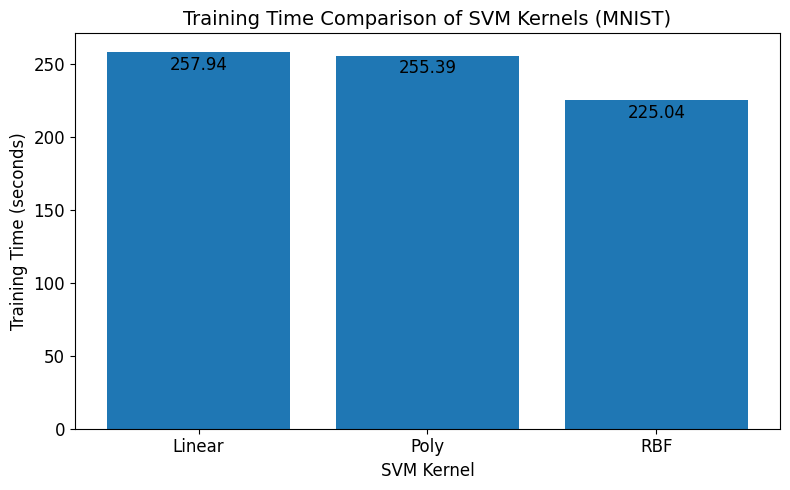

In [ ]:
import matplotlib.pyplot as plt

# Convert "Training time (s)" to numeric in case they are strings
svc_comparation["Training time (s)"] = svc_comparation["Training time (s)"].astype(float)

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(svc_comparation.index, svc_comparation["Training time (s)"])

# Add labels and title
plt.title("Training Time Comparison of SVM Kernels (MNIST)", fontsize=14)
plt.xlabel("SVM Kernel", fontsize=12)
plt.ylabel("Training Time (seconds)", fontsize=12)

# Optional: display values on top of bars
for i, v in enumerate(svc_comparation["Training time (s)"]):
    plt.text(i, v - 12, f"{v:.2f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

After selecting the best kernel we compare all the models from assigment 4 with the best kernel selected:

In [ ]:
all_best_models = pd.concat([
    best_poly_result,
    best_forest_clf_result,
    best_sgd_clf_result,
    best_knn_result,
])
all_best_models

,Accuracy Test,Accuracy Train,Precision,Recall,F1 Score,Training time (s),Prediction Time (s)
Poly,0.9802,0.9997,0.9802,0.9802,0.9802,255.39,64.89
Random Forest,0.9704,1.0000,0.9704,0.9704,0.9704,31.49,0.32
SGD,0.8933,0.9014,0.9104,0.8933,0.8975,251.14,0.02
KNN,0.9489,1.0000,0.9490,0.9489,0.9488,0.30,5.36
